# Project 3 - NICER

The purpose of this notebook is to produce the necessary plots and perform any auxiliary calculations required for the analysis steps associated with the project. As such, any answers to questions involving the reason for performing the various steps is left to the submission pdf writeup.


In [215]:
#Module imports
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import os

In [216]:
#function for producing nice plots of fits file data
def plot_fits(data, title, xlabel, ylabel, fontsize):
    plt.figure()
    plt.rcParams.update({
        'text.usetex': True,
        'font.family': 'serif',
        'font.serif': ['Palatino']
    })
    plt.plot(data[0], data[1])
    plt.title(title, fontsize = fontsize)
    plt.xlabel(xlabel, fontsize= fontsize-1)
    plt.ylabel(ylabel, fontsize= fontsize-1)
    plt.show()

## Installation

### Downloading and Installing CALDB

We need to use the associated calibration file found at ./data/nicer/xti/cpf/arf/nixtiaveonaxis20170601v001.arf and plot the spectral response as a function of energy.

Loading in and taking a look at the spectral response of the first Ancillary Response File (ARF).

In [217]:
arf_file_path = 'caldb/data/nicer/xti/cpf/arf/nixtiaveonaxis20170601v001.arf' 
arf_file = fits.open(arf_file_path)

#Inspect the fits file to find the correct key for our desired data (specresp in this case)
arf_file.info()

Filename: caldb/data/nicer/xti/cpf/arf/nixtiaveonaxis20170601v001.arf
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      30   ()      
  1  SPECRESP      1 BinTableHDU     81   3980R x 8C   [E, E, E, E, E, E, E, E]   


In [218]:
#print out the columns of the data set to see where energy and specresp are
arf_file[1].columns

ColDefs(
    name = 'ENERG_LO'; format = 'E'; unit = 'keV'
    name = 'ENERG_HI'; format = 'E'; unit = 'keV'
    name = 'SPECRESP'; format = 'E'; unit = 'cm**2'
    name = 'ENERGY'; format = 'E'; unit = 'keV'
    name = 'XRCAREA'; format = 'E'; unit = 'cm2'
    name = 'QE'; format = 'E'
    name = 'WINDOW'; format = 'E'
    name = 'THERMALSD'; format = 'E'
)

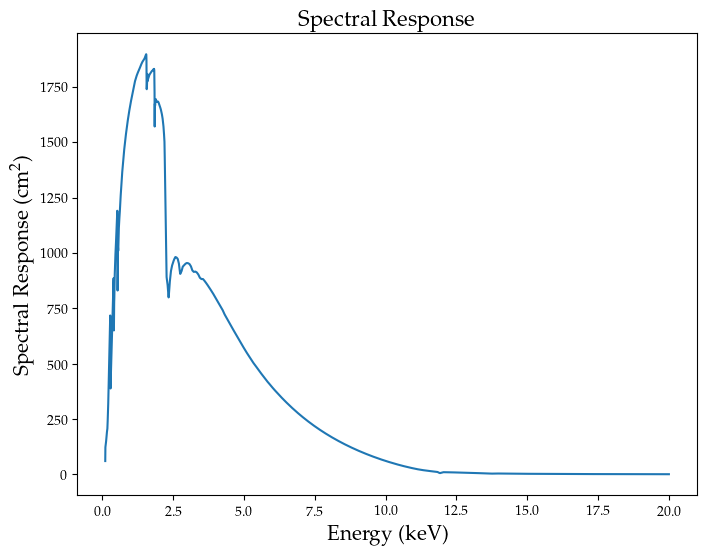

In [219]:
#define energy and spectral response variables for plotting
energy = arf_file[1].data['ENERGY']
specresp = arf_file[1].data['SPECRESP']

#plot the spectral response as a function of energy
plot_fits((energy, specresp), 'Spectral Response', 'Energy (keV)', 'Spectral Response (cm$^{2}$)', fontsize=16)

## Data Prep and Data Investigation

### Examining the Cleaned (cl.evt) File

In [220]:
cl_path = 'obs_id_data/2584010501/xti/event_cl/ni2584010501_0mpu7_cl.evt'
hdul_cl_path = fits.open(cl_path)

In [221]:
#examine possible data sets in the cleaned file (we are interested in the events)
hdul_cl_path.info()

Filename: obs_id_data/2584010501/xti/event_cl/ni2584010501_0mpu7_cl.evt
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      32   ()      
  1  EVENTS        1 BinTableHDU    284   2415871R x 14C   [1D, 1B, 1B, 1I, 1I, 1B, 1B, 8X, 1K, I, J, 1I, 1I, 1E]   
  2  FPM_SEL       1 BinTableHDU    122   22977R x 3C   [1D, 56B, 56I]   
  3  GTI           1 BinTableHDU    254   25R x 2C   [D, D]   
  4  GTI_DET10     1 BinTableHDU    229   24R x 2C   [D, D]   
  5  GTI_MPU0      1 BinTableHDU    253   25R x 2C   [D, D]   
  6  GTI_MPU1      1 BinTableHDU    253   25R x 2C   [D, D]   
  7  GTI_MPU2      1 BinTableHDU    253   25R x 2C   [D, D]   
  8  GTI_MPU3      1 BinTableHDU    253   25R x 2C   [D, D]   
  9  GTI_MPU4      1 BinTableHDU    253   25R x 2C   [D, D]   
 10  GTI_MPU5      1 BinTableHDU    253   25R x 2C   [D, D]   
 11  GTI_MPU6      1 BinTableHDU    253   25R x 2C   [D, D]   


In [222]:
#retrieve the time and energy columns
print(hdul_cl_path[1].columns)
time_cl = hdul_cl_path[1].data['TIME']  #Time of events

#note we are taking the uncalibrated gain data
energy_cl = hdul_cl_path[1].data['PHA']   #PHA: Pulse Height Analyzer - detector measured quantity

ColDefs(
    name = 'TIME'; format = '1D'; unit = 's'; disp = 'F20.9'
    name = 'RAWX'; format = '1B'; unit = 'pixel'; coord_type = 'RAWX'; coord_ref_point = 0; coord_ref_value = 0.0; coord_inc = 1.0
    name = 'RAWY'; format = '1B'; unit = 'pixel'; coord_type = 'RAWY'; coord_ref_point = 0; coord_ref_value = 0.0; coord_inc = 1.0
    name = 'PHA'; format = '1I'; unit = 'chan'; null = -32768
    name = 'PHA_FAST'; format = '1I'; unit = 'chan'; null = -32768
    name = 'DET_ID'; format = '1B'; disp = 'I2.2'
    name = 'DEADTIME'; format = '1B'; unit = 's'; bscale = 6.202e-07; bzero = 3.101e-07; disp = 'F11.9'
    name = 'EVENT_FLAGS'; format = '8X'
    name = 'TICK'; format = '1K'
    name = 'MPU_A_TEMP'; format = 'I'; unit = 'Celsius'; null = -1; bscale = 0.10600843; bzero = -273.42105; disp = 'F6.3'
    name = 'MPU_UNDER_COUNT'; format = 'J'; null = -1
    name = 'PI_FAST'; format = '1I'; unit = 'chan'; null = -32768
    name = 'PI'; format = '1I'; unit = 'chan'; null = -32768
    name

#### Time and Raw Energy Plots

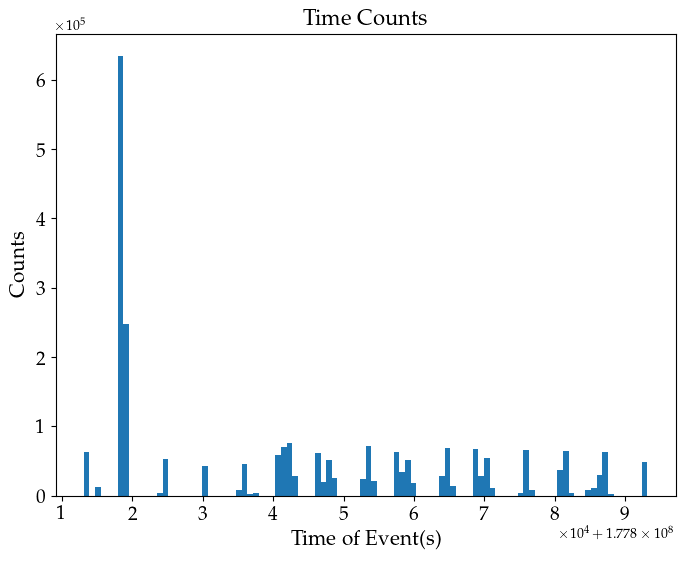

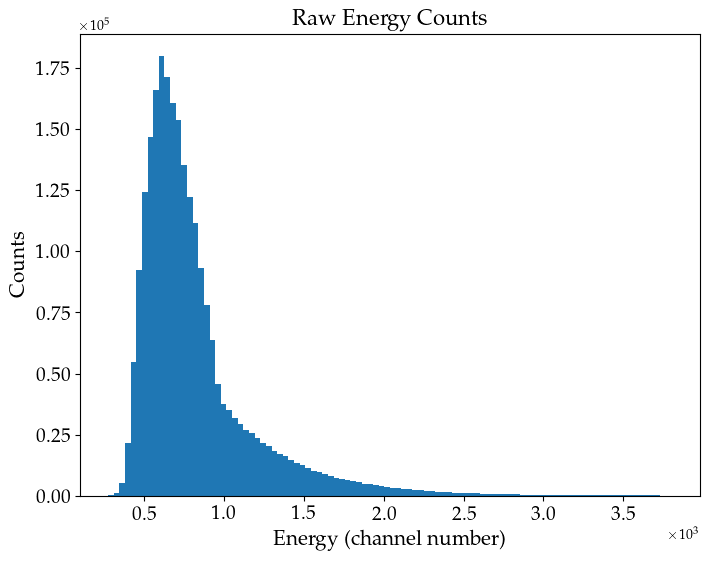

In [223]:
plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': ['Palatino']
})
fontsize=16
plt.rcParams['figure.figsize'] = (8, 6)

#plot time and raw energy histograms
fig = plt.hist(time_cl, bins=100)
plt.title('Time Counts', fontsize = fontsize)
plt.xlabel('Time of Event(s)', fontsize= fontsize-1)
plt.ylabel('Counts', fontsize= fontsize-1)
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
plt.tick_params(labelsize=fontsize-2)
plt.show()

fig = plt.hist(energy_cl, bins=100)
plt.title('Raw Energy Counts', fontsize = fontsize)
plt.xlabel('Energy (channel number)', fontsize= fontsize-1)
plt.ylabel('Counts', fontsize= fontsize-1)
plt.tick_params(labelsize=fontsize-2)
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
plt.show()


### Barycenter correction

In [224]:
bary_corr_file = 'obs_id_data/2584010501/xti/event_cl/ni2584010501_0mpu7_cl_barycorr.evt'
hdul_barycorr = fits.open(bary_corr_file)
hdul_barycorr.info()  #look for the EVENTS row

Filename: obs_id_data/2584010501/xti/event_cl/ni2584010501_0mpu7_cl_barycorr.evt
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      32   ()      
  1  EVENTS        1 BinTableHDU    310   2415871R x 14C   [1D, 1B, 1B, 1I, 1I, 1B, 1B, 8X, 1K, I, J, 1I, 1I, 1E]   
  2  FPM_SEL       1 BinTableHDU    129   22977R x 3C   [1D, 56B, 56I]   
  3  GTI           1 BinTableHDU    261   25R x 2C   [D, D]   
  4  GTI_DET10     1 BinTableHDU    234   24R x 2C   [D, D]   
  5  GTI_MPU0      1 BinTableHDU    260   25R x 2C   [D, D]   
  6  GTI_MPU1      1 BinTableHDU    260   25R x 2C   [D, D]   
  7  GTI_MPU2      1 BinTableHDU    260   25R x 2C   [D, D]   
  8  GTI_MPU3      1 BinTableHDU    260   25R x 2C   [D, D]   
  9  GTI_MPU4      1 BinTableHDU    260   25R x 2C   [D, D]   
 10  GTI_MPU5      1 BinTableHDU    260   25R x 2C   [D, D]   
 11  GTI_MPU6      1 BinTableHDU    260   25R x 2C   [D, D]   


In [225]:
barycenter_data = hdul_barycorr[1].data
barycenter_data.columns  #inspect the columns of the EVENTS row

ColDefs(
    name = 'TIME'; format = '1D'; unit = 's'; disp = 'F20.9'
    name = 'RAWX'; format = '1B'; unit = 'pixel'; coord_type = 'RAWX'; coord_ref_point = 0; coord_ref_value = 0.0; coord_inc = 1.0
    name = 'RAWY'; format = '1B'; unit = 'pixel'; coord_type = 'RAWY'; coord_ref_point = 0; coord_ref_value = 0.0; coord_inc = 1.0
    name = 'PHA'; format = '1I'; unit = 'chan'; null = -32768
    name = 'PHA_FAST'; format = '1I'; unit = 'chan'; null = -32768
    name = 'DET_ID'; format = '1B'; disp = 'I2.2'
    name = 'DEADTIME'; format = '1B'; unit = 's'; bscale = 6.202e-07; bzero = 3.101e-07; disp = 'F11.9'
    name = 'EVENT_FLAGS'; format = '8X'
    name = 'TICK'; format = '1K'
    name = 'MPU_A_TEMP'; format = 'I'; unit = 'Celsius'; null = -1; bscale = 0.10600843; bzero = -273.42105; disp = 'F6.3'
    name = 'MPU_UNDER_COUNT'; format = 'J'; null = -1
    name = 'PI_FAST'; format = '1I'; unit = 'chan'; null = -32768
    name = 'PI'; format = '1I'; unit = 'chan'; null = -32768
    name

#### Comparing times

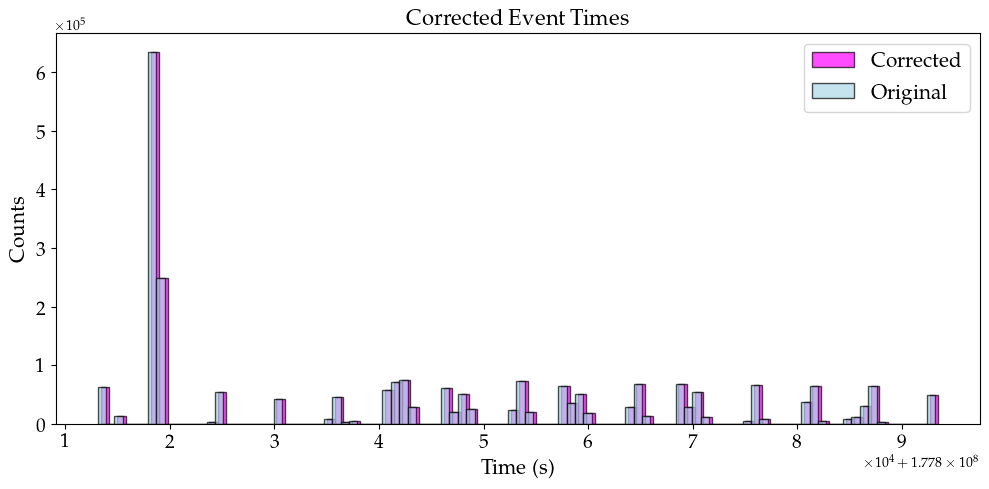

In [226]:
#load the original and corrected event files
original_file = fits.open('obs_id_data/2584010501/xti/event_cl/ni2584010501_0mpu7_cl.evt')
corrected_file = fits.open('obs_id_data/2584010501/xti/event_cl/ni2584010501_0mpu7_cl_barycorr_no_clobber.evt')

#extract event times from both files
original_times = original_file[1].data['TIME']
corrected_times = corrected_file[1].data['TIME']

#plot histograms comparing time distributions
plt.figure(figsize=(10, 5))

#plot comparing event times
fontsize=16
fig = plt.hist(corrected_times, bins=100, color='magenta', alpha=0.7, edgecolor='black', label="Corrected")
fig = plt.hist(original_times, bins=100, color='lightblue', alpha=0.7, edgecolor='black', label="Original")
plt.title("Corrected Event Times", fontsize=fontsize)
plt.xlabel("Time (s)", fontsize=fontsize-1)
plt.ylabel("Counts", fontsize=fontsize-1)
plt.tick_params(labelsize=fontsize-2)
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
plt.legend(fontsize=fontsize-1)
plt.tight_layout()
plt.show()


## Light Curves

### Conversion from channel to eV

From the gain/energy scale documentation:

First, the PHA data should not be used for any real analysis since it has not been calibrated.

- units of PHA and PI are channels
    - this is the standard unit for pulse height channel quantities
- directly related to photon energy though the following:
    - each PI and PI_FAST bin is 10 eV or 0.01 keV
    - this is a linear scale, so eg PI = 100 corresponds to 1.00 to 1.01 keV
    - the full range of PI from 0 to 1501 is therefore 0.0 to 15.01 keV

We want to produce 3 light curves with the following parameters:

1. 0.1s time bins, 0.3 - 10 keV
2. 0.1s time bin, 3 - 10 keV
3. 0.1s time bin, 0.3 - 1 keV

the input suffix in the nicerl3-lc command calls for time in units of seconds and energy in PI value. therefore we actually want the following configurations:

1. 0.1s, 30-1000
2. 0.1s, 300-1000
3. 0.1s, 30-100

In [227]:
#conversions between channel number and keV
print(0.3/0.01)
print(10/0.01)
print()
print(3/0.01)
print()
print(1/0.01)

30.0
1000.0

300.0

100.0


### Plotting Flare Dominated Regions

In [228]:
lc_congif1_file = 'obs_id_data/2584010501/xti/event_cl/ni2584010501mpu7_srconfig_1.lc'
lc_congif2_file = 'obs_id_data/2584010501/xti/event_cl/ni2584010501mpu7_srconfig_2.lc'
lc_congif3_file = 'obs_id_data/2584010501/xti/event_cl/ni2584010501mpu7_srconfig_3.lc'

hdul_lc_congif1 = fits.open(lc_congif1_file)
hdul_lc_congif2 = fits.open(lc_congif2_file)
hdul_lc_congif3 = fits.open(lc_congif3_file)

In [229]:
hdul_lc_congif1.info()

Filename: obs_id_data/2584010501/xti/event_cl/ni2584010501mpu7_srconfig_1.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     215   ()      
  1  RATE          1 BinTableHDU    281   183570R x 5C   [D, E, E, E, 1E]   
  2  GTI           1 BinTableHDU     53   25R x 2C   [1D, 1D]   


In [230]:
lc_congif1_data = hdul_lc_congif1['RATE'].data
lc_congif2_data = hdul_lc_congif2['RATE'].data
lc_congif3_data = hdul_lc_congif3['RATE'].data
lc_congif1_data.columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 's'
    name = 'RATE'; format = 'E'; unit = 'count/s/52FPM'
    name = 'ERROR'; format = 'E'; unit = 'count/s/52FPM'
    name = 'FRACEXP'; format = 'E'
    name = 'NUM_FPM_SEL'; format = '1E'
)

In [231]:
#lc time data from each configuration
lc_config1_time = lc_congif1_data['TIME']
lc_config2_time = lc_congif2_data['TIME']
lc_config3_time = lc_congif3_data['TIME']

#lc rate data from each configuration 
lc_config1_rate = lc_congif1_data['RATE']
lc_config2_rate = lc_congif2_data['RATE']
lc_config3_rate = lc_congif3_data['RATE']

#### Light Curve

We want the flare dominated region which makes up about 60 second worth of data.  

$t_0$ is equal to 5562.5


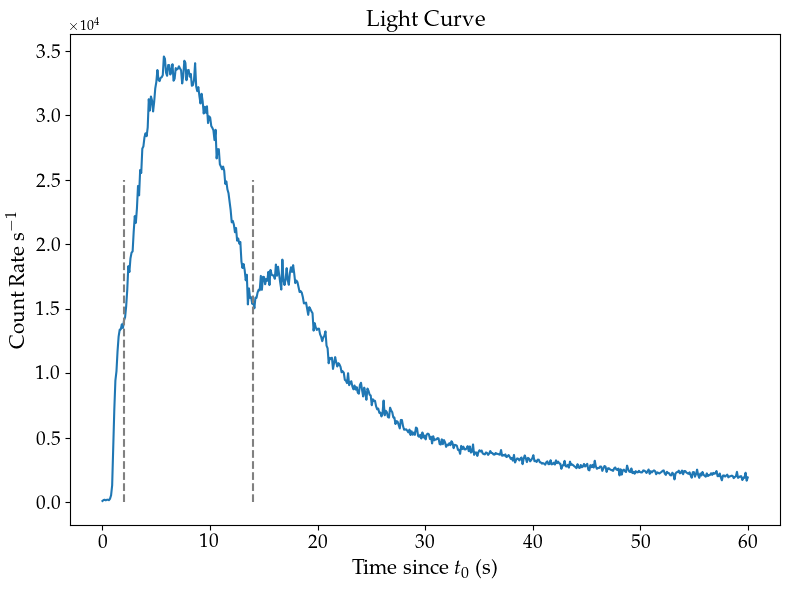

In [232]:
#60s of data = 60s/0.1s/bin = 600bins
bin_left = 12030
bin_right = bin_left + 600  #left bin start + 60s in units of bins
t_vals = np.linspace(0, 60, 600)
print(f"$t_0$ is equal to {lc_config1_time[bin_left]}")

fontsize = 16
plt.plot(t_vals, lc_config1_rate[bin_left:bin_right])
plt.title("Light Curve", fontsize=fontsize)
plt.xlabel("Time since $t_0$ (s)", fontsize=fontsize-1)
plt.ylabel("Count Rate s$^{-1}$", fontsize=fontsize-1)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.tick_params(labelsize=fontsize-2)
plt.vlines(x=(2, 14) , ymin=0, ymax=2.5e4, color='grey', linestyles='--')
# plt.grid()
# plt.legend(fontsize=fontsize-1)
plt.tight_layout()
plt.show()

#### Hardness Ratio

/tmp/ipykernel_83636/4266621225.py:2: RuntimeWarning: divide by zero encountered in divide
  hardness_ratio = lc_config2_rate/lc_config3_rate
/tmp/ipykernel_83636/4266621225.py:2: RuntimeWarning: invalid value encountered in divide
  hardness_ratio = lc_config2_rate/lc_config3_rate


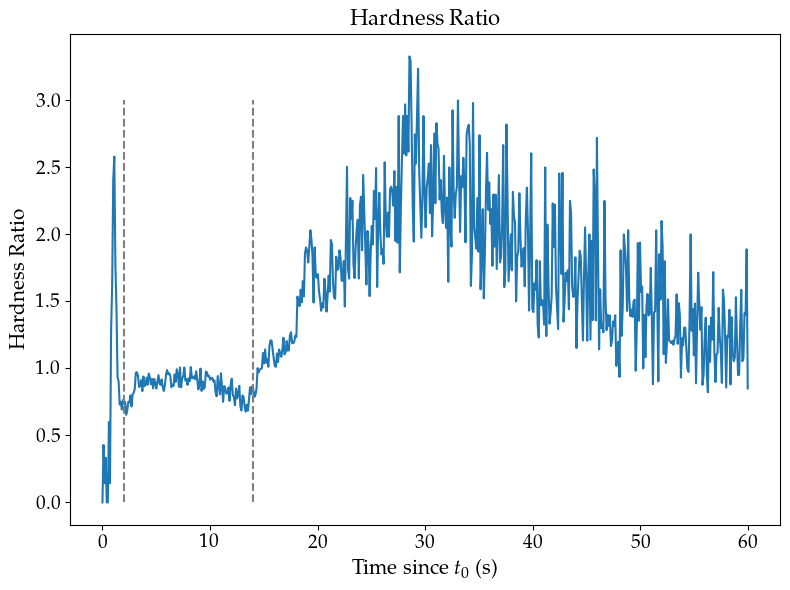

In [233]:
#compute the hardness ratio (high energy / low energy)
hardness_ratio = lc_config2_rate/lc_config3_rate

#plot the hardness ratio
plt.plot(t_vals, hardness_ratio[bin_left:bin_right])
plt.title("Hardness Ratio", fontsize=fontsize)
plt.xlabel("Time since $t_0$ (s)", fontsize=fontsize-1)
plt.ylabel("Hardness Ratio", fontsize=fontsize-1)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.tick_params(labelsize=fontsize-2)
# plt.legend(fontsize=fontsize-1)
plt.vlines(x=(2, 14) , ymin=0, ymax=3, color='grey', linestyles='--')
# plt.grid()
plt.tight_layout()
plt.show()

## Spectrum

#### Time Bins for the gti.txt file

These can come directly from the light curve data in the plots from the previous section.

In [234]:
#indices used above:
#60s of data = 60s/0.1s/bin = 600bins
bin_left = 12030
bin_right = bin_left + 600

#use these indices to extract the corresponding time data
time_array = np.zeros((600))
time_array[:] = lc_config1_time[bin_left:bin_right]

#start and stop bins
time_array_starts = time_array[::2]
time_array_stops = time_array[1::2]

#save in the correct .txt file format
bins = np.column_stack((time_array_starts, time_array_stops))
# print(bins)
np.savetxt('gti_barycorr.txt', bins, header=' # START STOP')

In [235]:
#inspect the header of the .evt files
fn = 'obs_id_data/2584010501/xti/event_cl/ni2584010501mpu7_srconfig_1.lc'
f = fits.open(fn)
f.info()


Filename: obs_id_data/2584010501/xti/event_cl/ni2584010501mpu7_srconfig_1.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     215   ()      
  1  RATE          1 BinTableHDU    281   183570R x 5C   [D, E, E, E, 1E]   
  2  GTI           1 BinTableHDU     53   25R x 2C   [1D, 1D]   


In [236]:
gti_info = f[1]
gti_info.header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   24 / width of table in bytes                        
NAXIS2  =               183570 / Number of bins                                 
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    5 / number of fields in each row                   
TTYPE1  = 'TIME    '           / NICER MET Timestamp                            
TFORM1  = 'D       '           / data format of field: 8-byte DOUBLE            
TUNIT1  = 's       '           / physical unit of field                         
TTYPE2  = 'RATE    '           / Average rate (scaled to 52 FPMs)               
TFORM2  = 'E       '        